In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EDA and preprocessing

In [37]:
df = pd.read_csv('winequality.csv')

In [38]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4


In [39]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,7.617105,0.572730,0.215395,2.308553,0.102671,15.486842,58.236842,0.996623,3.330855,0.697500,9.859868
std,1.055592,0.183557,0.187107,1.138821,0.077980,9.768843,36.618986,0.001230,0.165281,0.283328,0.874227
min,4.600000,0.220000,0.000000,1.200000,0.045000,3.000000,10.000000,0.991600,2.740000,0.390000,9.000000
25%,7.075000,0.450000,0.070000,1.800000,0.074750,9.000000,29.000000,0.996200,3.217500,0.547500,9.400000
50%,7.800000,0.560000,0.180000,2.000000,0.082000,13.000000,52.000000,0.996800,3.335000,0.600000,9.500000
75%,8.200000,0.670000,0.300000,2.300000,0.097000,19.000000,83.500000,0.997200,3.420000,0.770000,10.125000
max,11.200000,1.330000,1.000000,10.700000,0.610000,52.000000,153.000000,0.999600,3.900000,2.000000,14.000000


In [40]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [41]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
147,7.6,0.49,0.26,1.6,0.236,10,88,0.9968,3.11,0.80,9.3
148,6.9,0.49,0.10,2.3,0.074,12,30,0.9959,3.42,0.58,10.2
149,8.2,0.40,0.44,2.8,0.089,11,43,0.9975,3.53,0.61,10.5
150,7.3,0.33,0.47,2.1,0.077,5,11,0.9958,3.33,0.53,10.3
151,9.2,0.52,1.00,3.4,0.610,32,69,0.9996,2.74,2.00,9.4


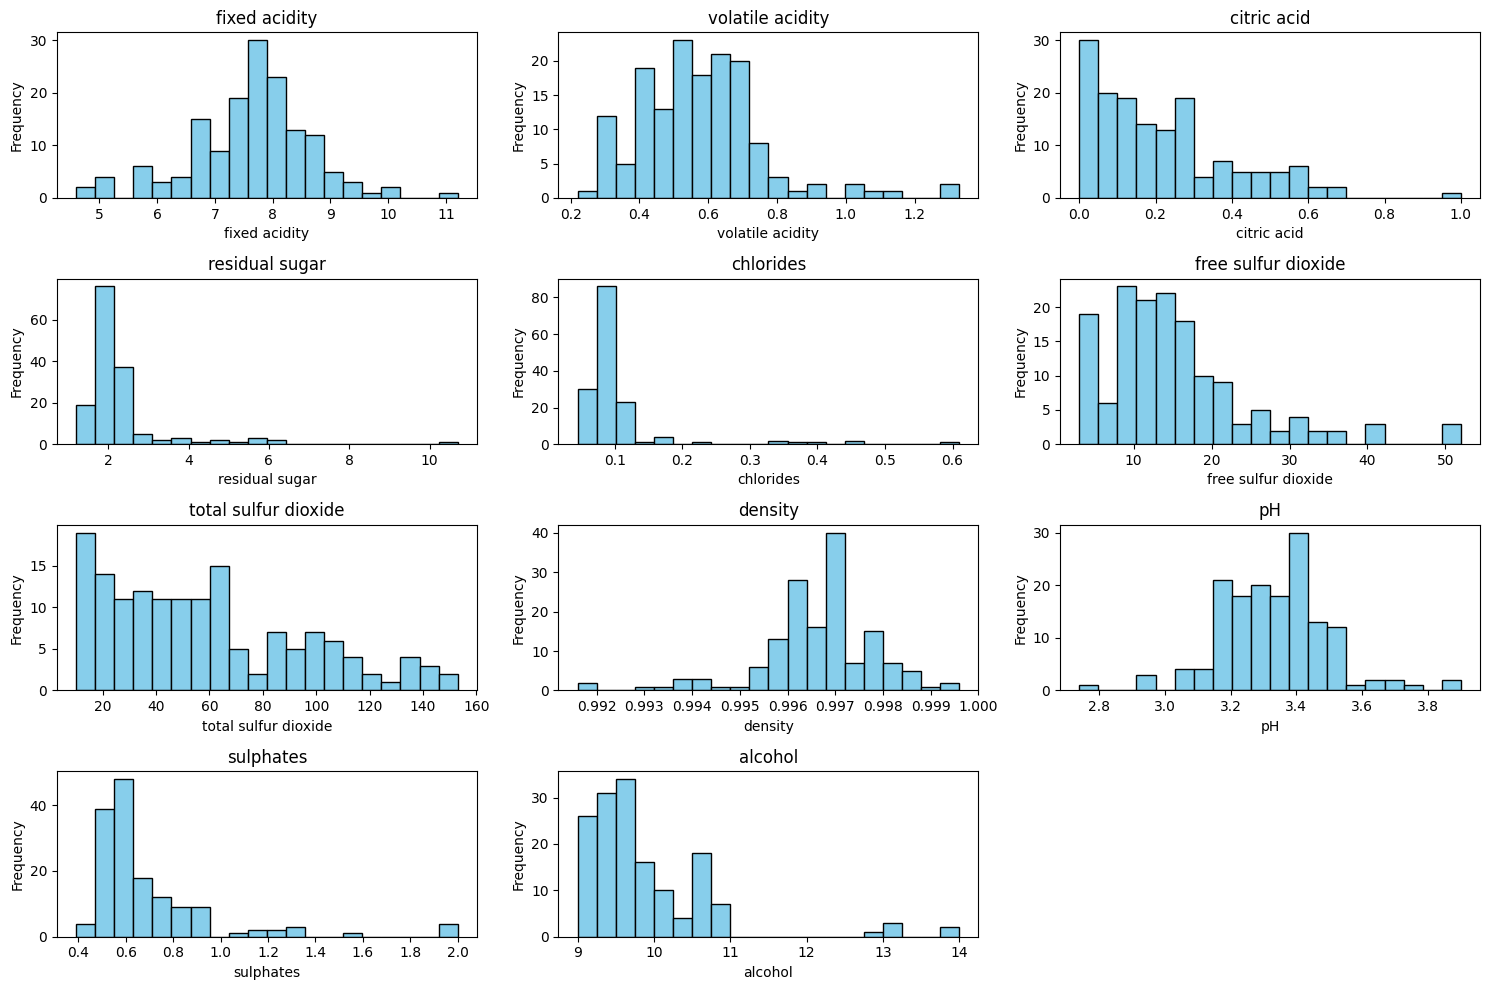

In [42]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [43]:
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide       int64
total sulfur dioxide      int64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object


In [44]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [45]:
print(df_scaled.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.206351          0.695643    -1.154989       -0.359937  -0.343154   
1       0.173835          1.679505    -1.154989        0.256766  -0.060098   
2       0.173835          1.023597    -0.940501       -0.007535  -0.137295   
3       3.405424         -1.600033     1.847841       -0.359937  -0.356020   
4      -0.206351          0.695643    -1.154989       -0.359937  -0.343154   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.460820             -0.664053  0.960259  1.087463  -0.486908   
1             0.977046              0.240098  0.144388 -0.794331  -0.061970   
2            -0.050001             -0.116083  0.307562 -0.430113  -0.168205   
3             0.155408              0.048308  1.123434 -1.037143  -0.416085   
4            -0.460820             -0.664053  0.960259  1.087463  -0.486908   

    alcohol  
0 -0.527768  
1 -0.068708  
2 -0.068708  


In [46]:
from scipy.stats import zscore

# Specify the columns to check for outliers
columns_to_check = ['citric acid', 'chlorides','residual sugar','alcohol','sulphates']  # Replace with your columns

# Calculate z-scores for each specified column and filter rows within the threshold
df_no_outliers = df_scaled[(zscore(df_scaled[columns_to_check]) < 3).all(axis=1)]


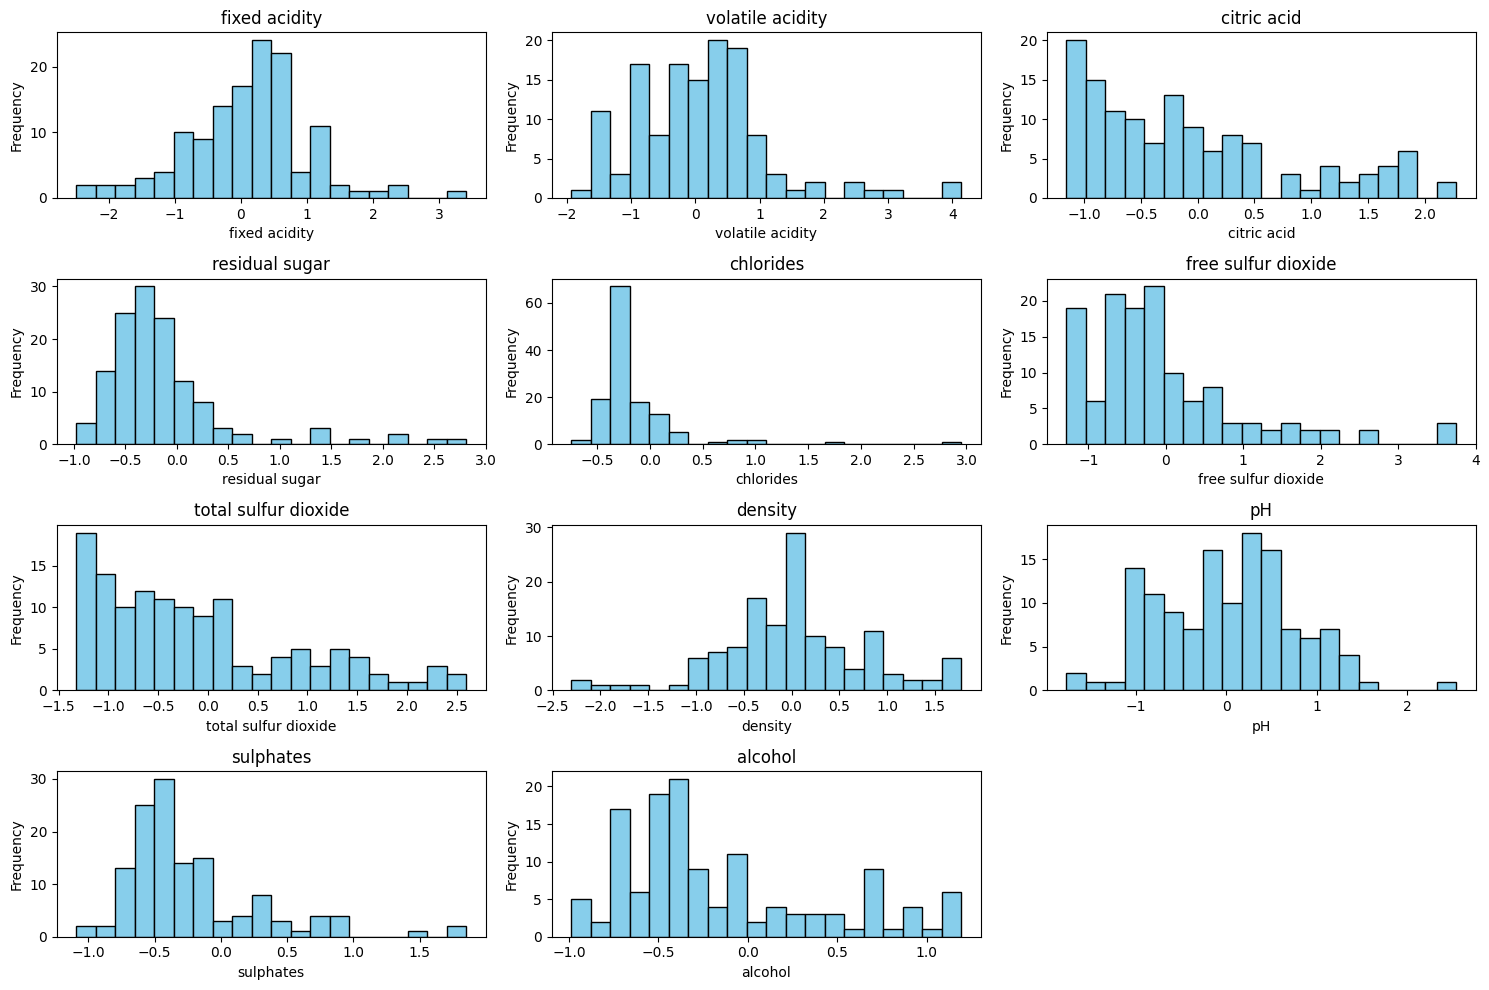

In [47]:

# Assuming 'df' is your DataFrame
numerical_columns = df_no_outliers.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    plt.hist(df_no_outliers[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

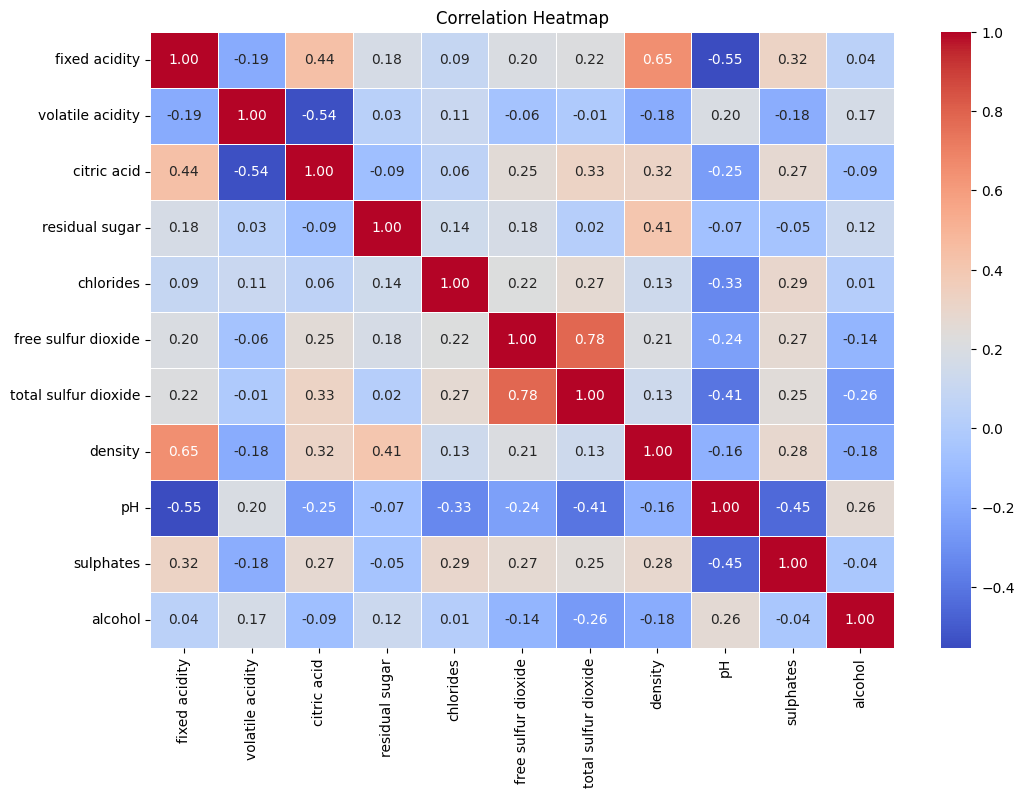

In [48]:
correlation_matrix = df_no_outliers.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [49]:
from sklearn.decomposition import PCA

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)  # Adjust threshold as needed
principal_components = pca.fit_transform(df_no_outliers)

# Check explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of each component:", explained_variance)


Explained variance ratio of each component: [0.35294937 0.20070142 0.13601295 0.08069091 0.06604402 0.05109836
 0.03580522 0.03406734]


In [50]:
correlation_threshold = 0.5  # You can adjust this value

# Find pairs of highly correlated features
high_correlation_pairs = correlation_matrix.where(
    (correlation_matrix.abs() > correlation_threshold) & (correlation_matrix != 1)  # Exclude self-correlation
).stack().sort_values(ascending=False)

# Display highly correlated feature pairs
print("Highly Correlated Feature Pairs:\n", high_correlation_pairs)

Highly Correlated Feature Pairs:
 free sulfur dioxide   total sulfur dioxide    0.784497
total sulfur dioxide  free sulfur dioxide     0.784497
fixed acidity         density                 0.650257
density               fixed acidity           0.650257
volatile acidity      citric acid            -0.536935
citric acid           volatile acidity       -0.536935
fixed acidity         pH                     -0.554253
pH                    fixed acidity          -0.554253
dtype: float64


## Clustering algorithms

The two clustering algorithms i chose are:


*   K mean clustering
*   Hierarchial clustering

K means clustering is simple to implement and very efficient as well as being easy to interpret.

Hierarchial clustering is suitable for small datasets such as this one.



## K means clustering

In [51]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [75]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your dataset (assuming df is your DataFrame)
# Select specific columns for clustering (replace 'col1', 'col2', etc. with your actual column names)
columns_to_cluster = ['total sulfur dioxide', 'density', 'volatile acidity','pH','residual sugar','chlorides','sulphates','alcohol']  # Specify the columns you want to use
X = df_scaled[columns_to_cluster]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (K)
k = 6  # You can change this based on your analysis, e.g., using the elbow method

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=k, random_state=23)
kmeans.fit(X_scaled)

# Get cluster labels
labels = kmeans.labels_

# Add cluster labels to the original DataFrame
df_scaled['Cluster'] = labels

# Evaluation metrics
# Inertia (within-cluster sum of squares)
inertia_value = kmeans.inertia_

# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, labels)

print(f'Inertia: {inertia_value}')
print(f'Silhouette Score: {silhouette_avg}')


Inertia: 512.6307224441119
Silhouette Score: 0.2618931428351653


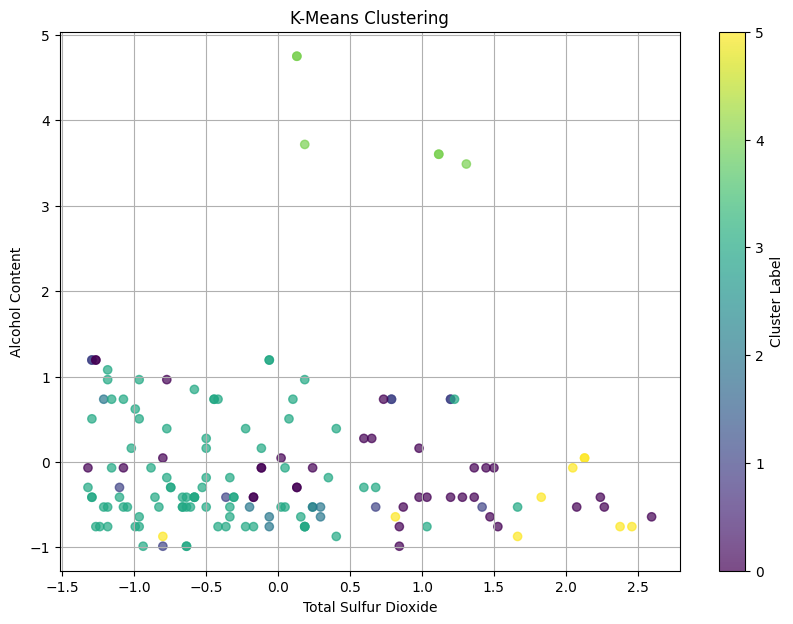

In [82]:
# Visualize the clusters in a scatter plot using two selected features
plt.figure(figsize=(10, 7))
plt.scatter(df_scaled['total sulfur dioxide'], df_scaled['alcohol'], c=labels, cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Alcohol Content')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()


changing the value of k from 3 to 4 gives us better results

## Hierarchial clustering

In [99]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

# Load your dataset (assuming df is your DataFrame)
# Select specific columns for clustering (replace 'col1', 'col2', etc. with your actual column names)
columns_to_cluster = ['total sulfur dioxide', 'density', 'volatile acidity','pH','residual sugar','chlorides','sulphates','alcohol']  # Specify the columns you want to use
X = df_scaled[columns_to_cluster]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Hierarchical Clustering
# You can specify the number of clusters here
k = 5# Choose the number of clusters

# Create an AgglomerativeClustering object
hierarchical = AgglomerativeClustering(n_clusters=k, linkage='complete')
labels = hierarchical.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df_scaled['Cluster'] = labels

# Evaluation metric: Silhouette Score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {silhouette_avg}')





Silhouette Score: 0.20849327818515462


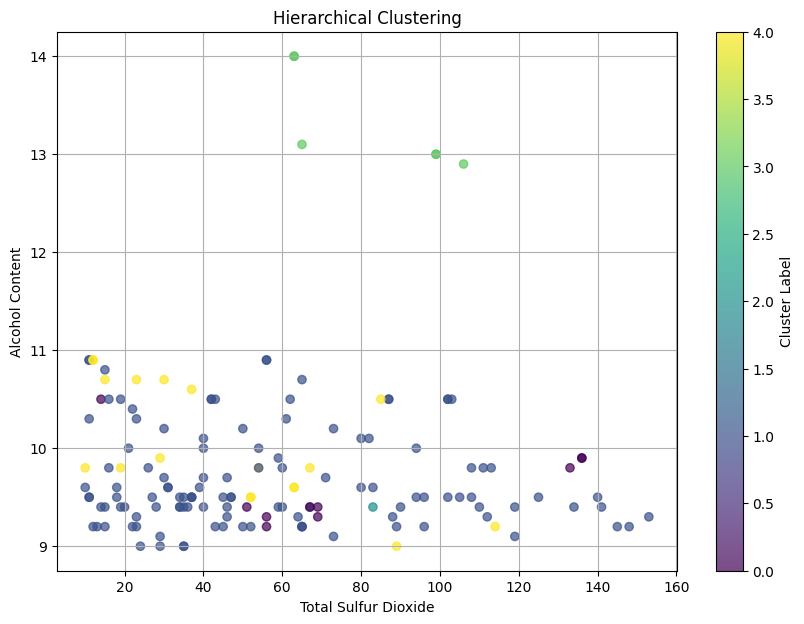

In [100]:
plt.figure(figsize=(10, 7))
plt.scatter(df['total sulfur dioxide'], df['alcohol'], c=labels, cmap='viridis', alpha=0.7)
plt.title('Hierarchical Clustering')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Alcohol Content')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()